In [1]:
# import numpy as np
# # import seaborn as sns
# import os
# import time

# from sklearn.preprocessing import StandardScaler
# from scipy.spatial import distance
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# from sklearn.model_selection import KFold
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from Data import Data
# # from functions import *

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-06-08 19:50:41.668897: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-08 19:50:41.724970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-

In [3]:
base_path = '/home/aacastro/Alejandro/DQ_ACA_2024/A/ZN_1D_imgs/orig/'
data_processor = Data(base_path)
X, Y, ass_f, ass_l = data_processor.get_data('train.npz', 'validation.npz', 'test.npz', 'assess.npz')
Y = np.argmax(Y, axis=1)

# 90% de varianza explicada

In [4]:
OBJETIVO_VARIANZA_EXPLICADA = 0.9

X_flattened = X.reshape(4482, 264 * 18)
X_flattened= pd.DataFrame(X_flattened)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

pca = PCA(n_components=OBJETIVO_VARIANZA_EXPLICADA)
X_pca = pca.fit_transform(X_scaled)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.35684145 0.25116349 0.06112174 0.05217786 0.02925114 0.02726437
 0.01804689 0.017692   0.01514957 0.01267201 0.01003623 0.00897986
 0.00786917 0.006583   0.00543928 0.00491636 0.0047862  0.00472001
 0.00437977 0.00401375]


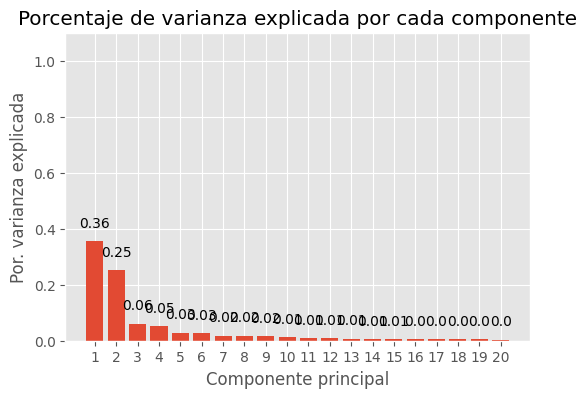

In [5]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

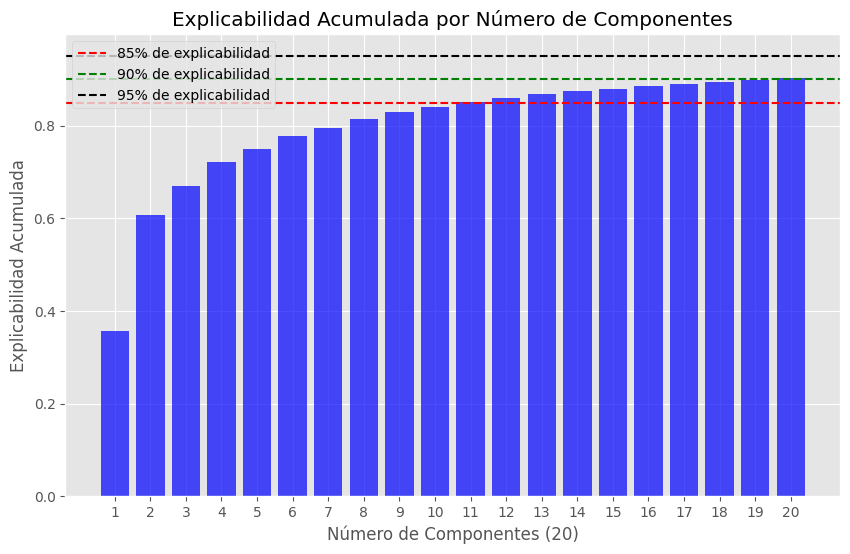

In [6]:
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear una lista de números de componentes para el eje x
n_components = np.arange(1, len(explained_variance_ratio) + 1)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(n_components, cumulative_explained_variance_ratio, color='blue', alpha=0.7)

# Añadir líneas horizontales en 0.90 y en el porcentaje actual
plt.axhline(y=0.85, color='red', linestyle='--', label='85% de explicabilidad')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de explicabilidad')
plt.axhline(y=0.95, color='black', linestyle='--', label='95% de explicabilidad')

# Etiquetas y título
plt.xlabel(f'Número de Componentes ({len(n_components)})')
plt.ylabel('Explicabilidad Acumulada')
plt.title('Explicabilidad Acumulada por Número de Componentes')
plt.xticks(n_components)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

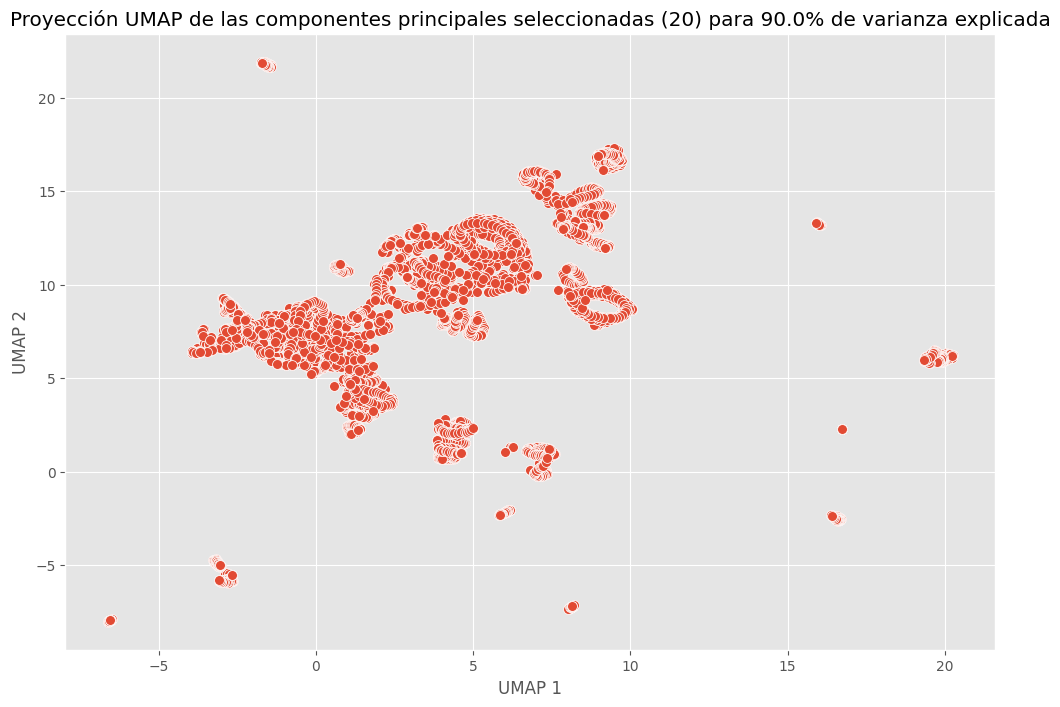

In [7]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X_pca)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], palette='viridis', s=50)
plt.title(f'Proyección UMAP de las componentes principales seleccionadas ({len(n_components)}) para {OBJETIVO_VARIANZA_EXPLICADA*100}% de varianza explicada')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

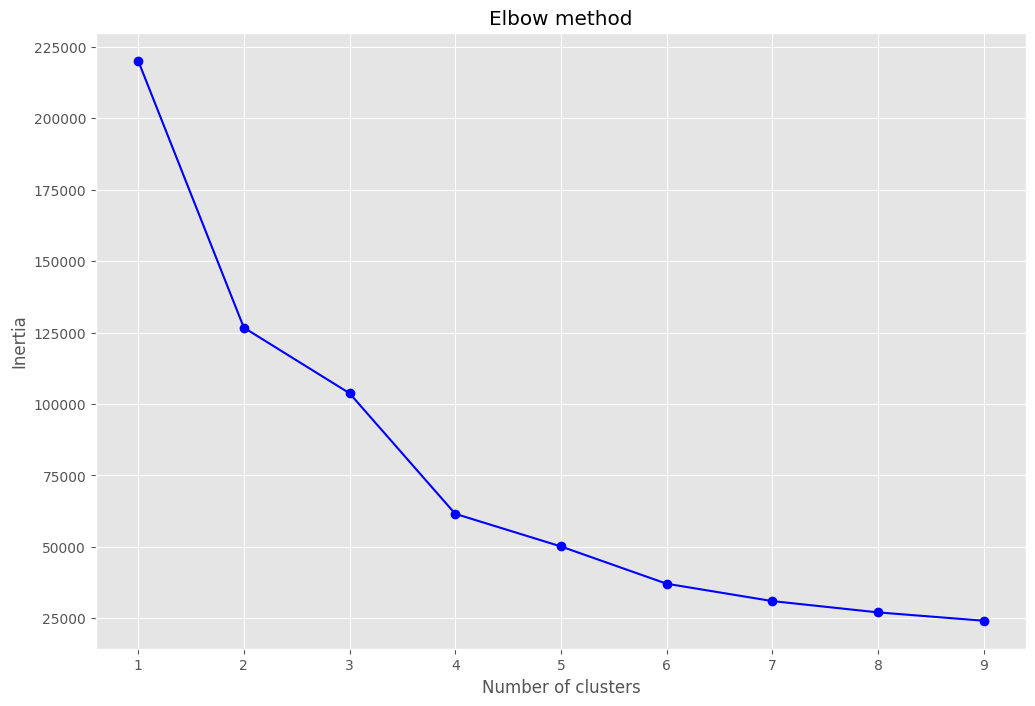

In [8]:
inertia = []
K = range(1, 10) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_umap)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

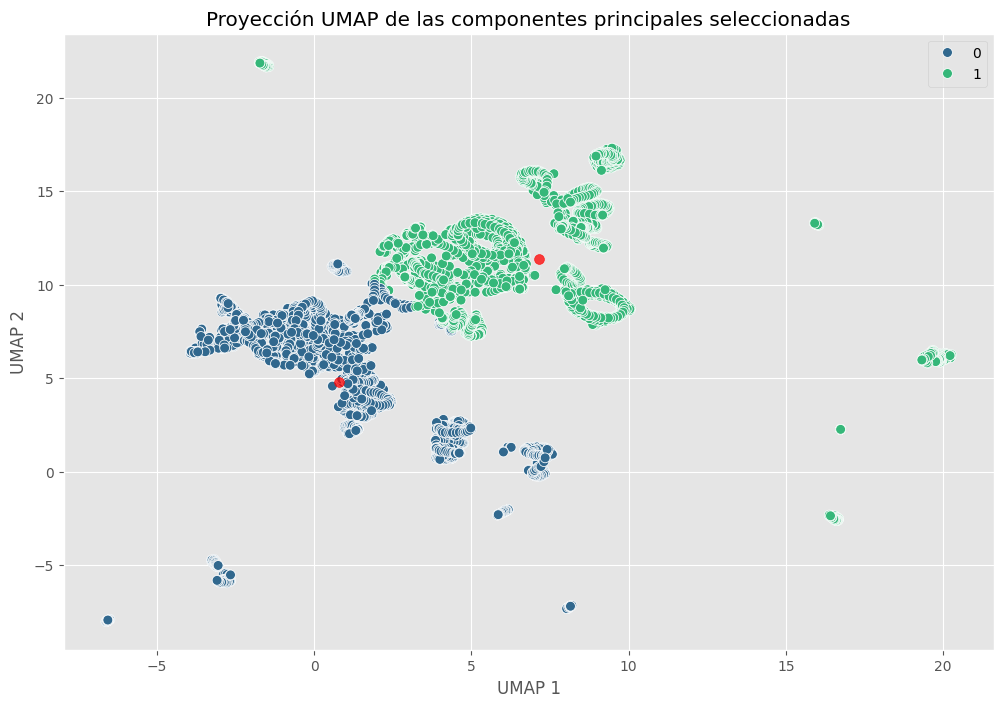

In [9]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis', s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='.')
plt.title('Proyección UMAP de las componentes principales seleccionadas')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [10]:
centroids_pca = umap_model.inverse_transform(centroids)
centroids_original = pca.inverse_transform(centroids_pca)
centroids_original_unscaled = scaler.inverse_transform(centroids_original)

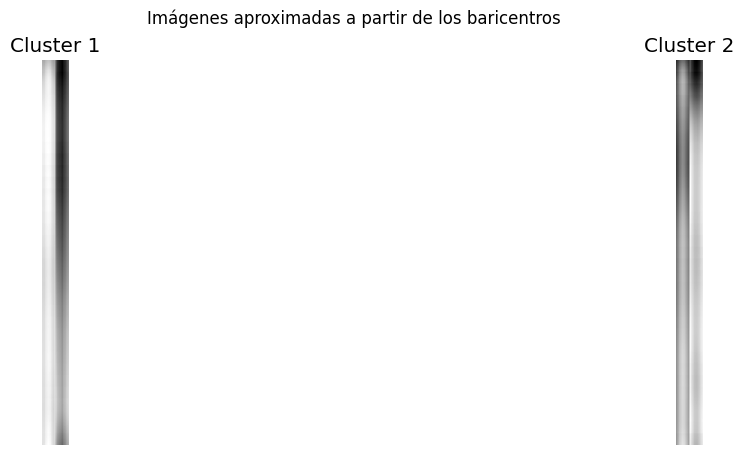

In [11]:
optimal_k = centroids_original_unscaled.shape[0]

# Deshacer el aplanamiento para cada centroide
centroids_images = centroids_original_unscaled.reshape(optimal_k, 264, 18)

# Visualizar las imágenes de los centroides
fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))

for i in range(optimal_k):
    ax = axes[i]
    ax.imshow(centroids_images[i], cmap='gray')
    ax.set_title(f'Cluster {i+1}')
    ax.axis('off')

plt.suptitle('Imágenes aproximadas a partir de los baricentros')
plt.show()

# 95% de varianza explicada

In [12]:
OBJETIVO_VARIANZA_EXPLICADA = 0.95

X_flattened = X.reshape(4482, 264 * 18)
X_flattened= pd.DataFrame(X_flattened)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

pca = PCA(n_components=OBJETIVO_VARIANZA_EXPLICADA)
X_pca = pca.fit_transform(X_scaled)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.35684145 0.25116349 0.06112174 0.05217786 0.02925114 0.02726437
 0.01804689 0.017692   0.01514957 0.01267201 0.01003623 0.00897986
 0.00786917 0.006583   0.00543928 0.00491636 0.0047862  0.00472001
 0.00437977 0.00401375 0.00390698 0.00299544 0.00275671 0.00248902
 0.00246931 0.00242816 0.00226233 0.00209476 0.00204027 0.00193496
 0.0018715  0.00178823 0.00171562 0.00154775 0.0015262  0.00138638
 0.00128966 0.0012429  0.00119158 0.00113428 0.00110429 0.00109016
 0.00105491 0.00104684 0.00102697 0.00096542 0.00095916]


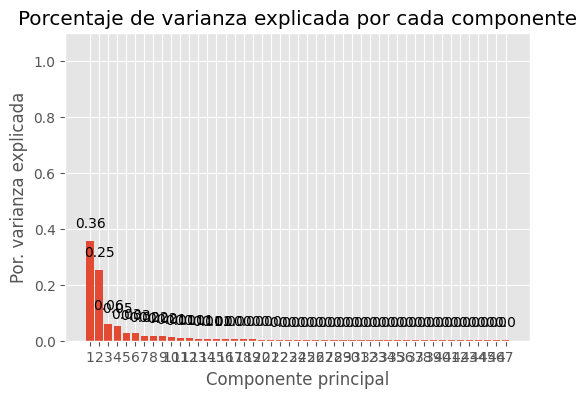

In [13]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

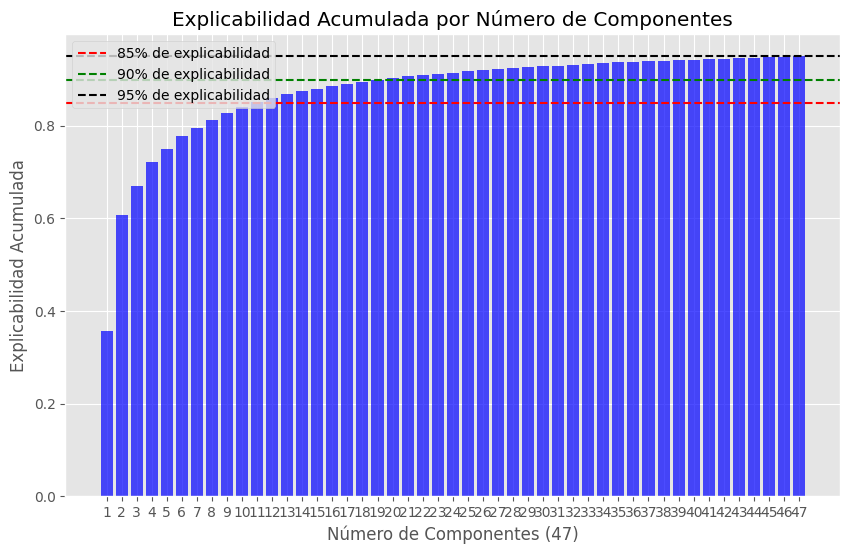

In [14]:
# Obtener la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear una lista de números de componentes para el eje x
n_components = np.arange(1, len(explained_variance_ratio) + 1)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(n_components, cumulative_explained_variance_ratio, color='blue', alpha=0.7)

# Añadir líneas horizontales en 0.90 y en el porcentaje actual
plt.axhline(y=0.85, color='red', linestyle='--', label='85% de explicabilidad')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de explicabilidad')
plt.axhline(y=0.95, color='black', linestyle='--', label='95% de explicabilidad')

# Etiquetas y título
plt.xlabel(f'Número de Componentes ({len(n_components)})')
plt.ylabel('Explicabilidad Acumulada')
plt.title('Explicabilidad Acumulada por Número de Componentes')
plt.xticks(n_components)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

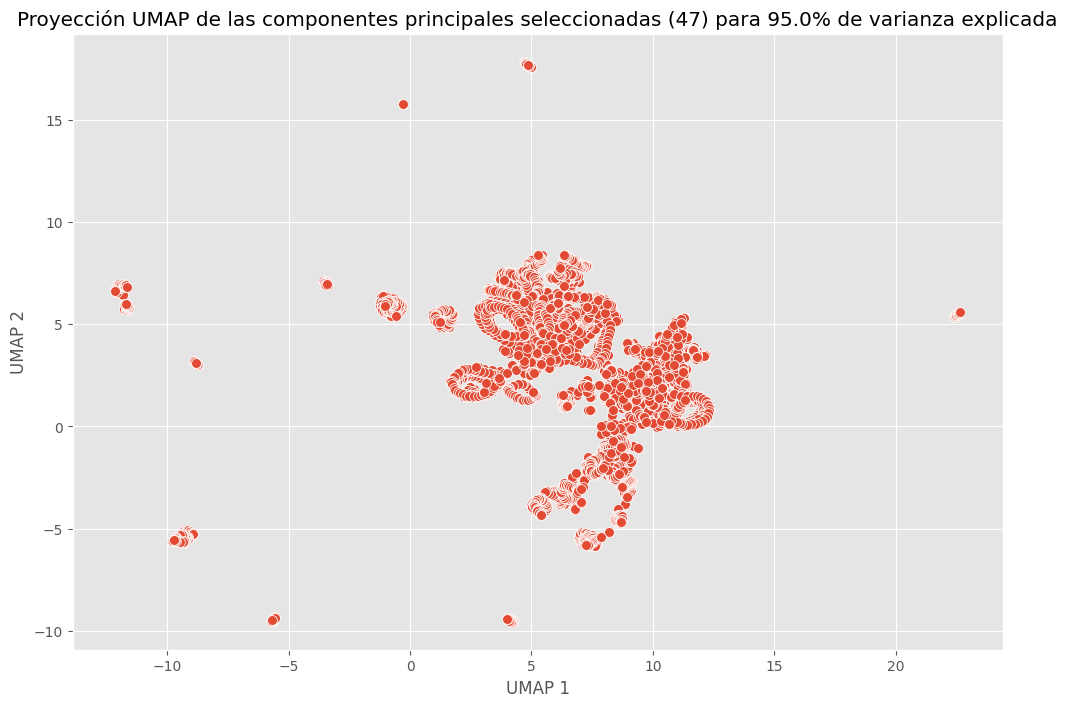

In [15]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(X_pca)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], palette='viridis', s=50)
plt.title(f'Proyección UMAP de las componentes principales seleccionadas ({len(n_components)}) para {OBJETIVO_VARIANZA_EXPLICADA*100}% de varianza explicada')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

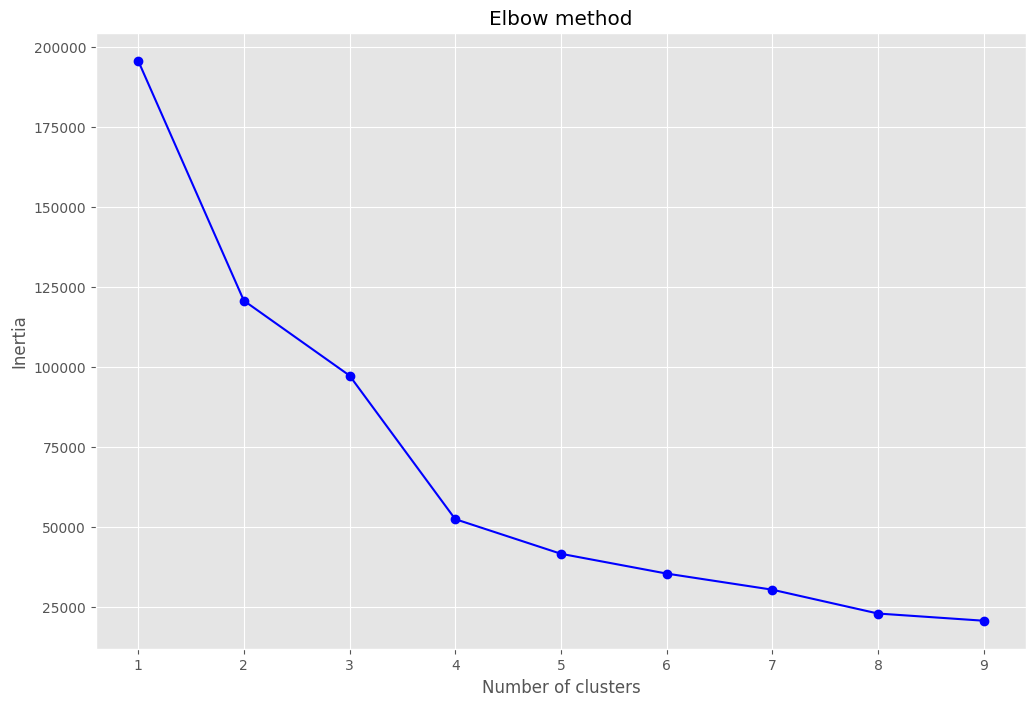

In [16]:
inertia = []
K = range(1, 10) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_umap)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

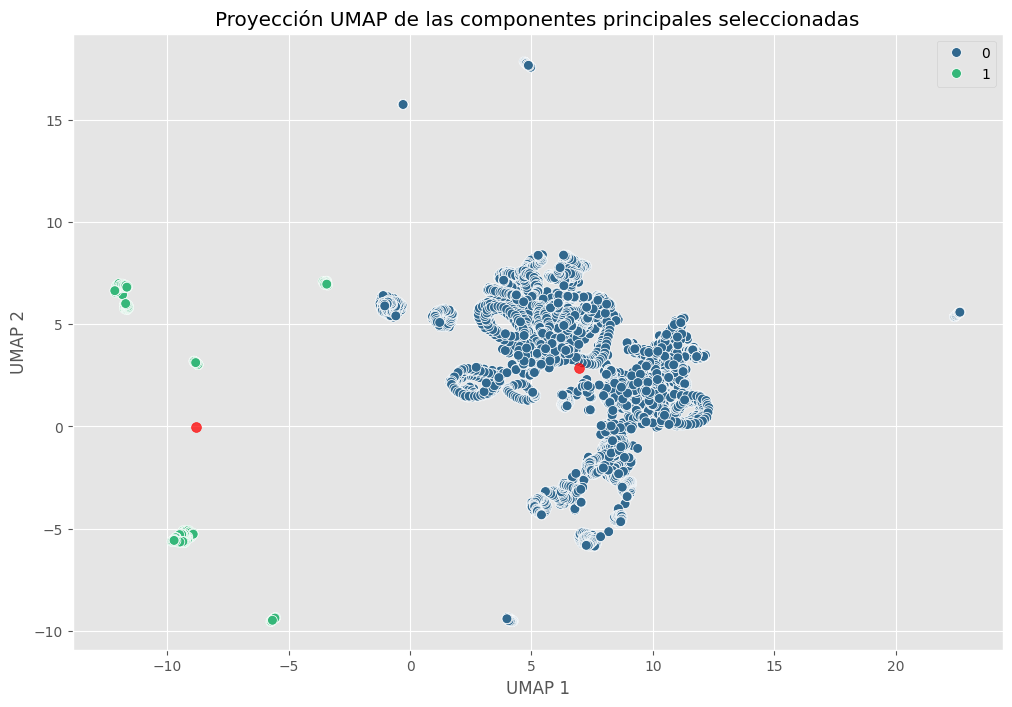

In [17]:
from sklearn.cluster import KMeans

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='viridis', s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='.')
plt.title('Proyección UMAP de las componentes principales seleccionadas')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [18]:
centroids_pca = umap_model.inverse_transform(centroids)
centroids_original = pca.inverse_transform(centroids_pca)
centroids_original_unscaled = scaler.inverse_transform(centroids_original)

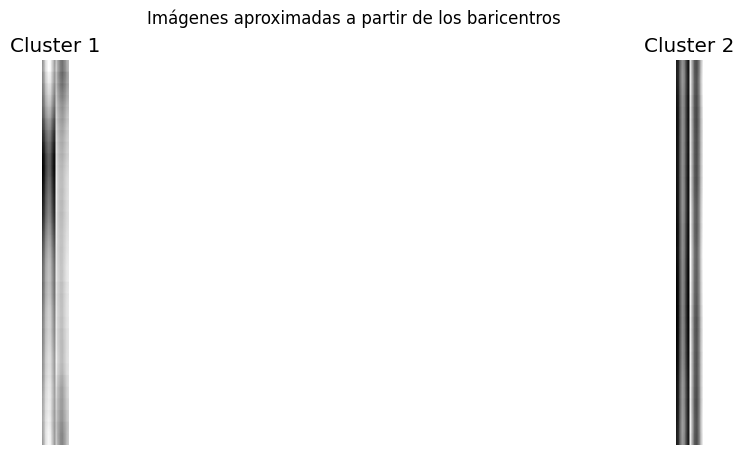

In [19]:
optimal_k = centroids_original_unscaled.shape[0]

# Deshacer el aplanamiento para cada centroide
centroids_images = centroids_original_unscaled.reshape(optimal_k, 264, 18)

# Visualizar las imágenes de los centroides
fig, axes = plt.subplots(1, optimal_k, figsize=(15, 5))

for i in range(optimal_k):
    ax = axes[i]
    ax.imshow(centroids_images[i], cmap='gray')
    ax.set_title(f'Cluster {i+1}')
    ax.axis('off')

plt.suptitle('Imágenes aproximadas a partir de los baricentros')
plt.show()